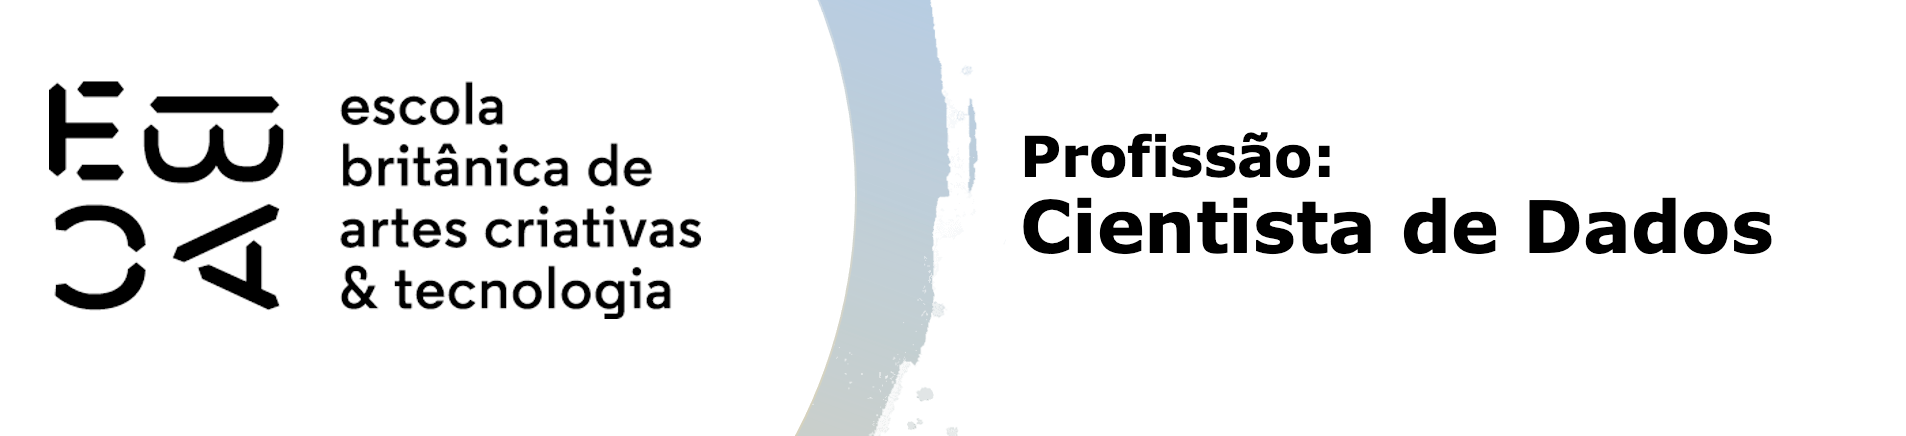

# Tarefa II

Neste projeto, estamos construindo um credit scoring para cartão de crédito, em um desenho amostral com 15 safras, e utilizando 12 meses de performance.

Carregue a base de dados ```credit_scoring.ftr```.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_feather('credit_scoring.ftr')
df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,mau
0,2015-01-01,5733,F,N,N,0,Empresário,Médio,Solteiro,Casa,43,6.873973,1.0,2515.39,False
1,2015-01-01,727,F,S,S,0,Assalariado,Médio,Casado,Casa,35,4.526027,2.0,3180.19,False
2,2015-01-01,6374,F,N,N,2,Assalariado,Médio,Casado,Casa,31,0.243836,4.0,1582.29,False
3,2015-01-01,9566,F,N,N,0,Assalariado,Médio,Casado,Casa,54,12.772603,2.0,13721.17,False
4,2015-01-01,9502,F,S,N,0,Assalariado,Superior incompleto,Solteiro,Casa,31,8.432877,1.0,2891.08,False


## Amostragem

Separe os três últimos meses como safras de validação *out of time* (oot).

Variáveis:<br>
Considere que a variável ```data_ref``` não é uma variável explicativa, é somente uma variável indicadora da safra, e não deve ser utilizada na modelagem. A variávei ```index``` é um identificador do cliente, e também não deve ser utilizada como covariável (variável explicativa). As restantes podem ser utilizadas para prever a inadimplência, incluindo a renda.


In [2]:
# 1. Ordenação dos Dados
df = df.sort_values(by='data_ref')

# 2. Separação da Amostra
# Encontrando a data de início dos três últimos meses
data_inicio_oot = df['data_ref'].unique()[-3] 

df_modelagem = df[df['data_ref'] < data_inicio_oot]
df_oot = df[df['data_ref'] >= data_inicio_oot]

# 3. Eliminação das Variáveis Indesejadas
df_modelagem = df_modelagem.drop(columns=['data_ref', 'index'])
df_oot = df_oot.drop(columns=['data_ref', 'index'])

# Exibindo os primeiros registros das bases separadas
print(df_modelagem.head())
print(df_oot.head())

      sexo posse_de_veiculo posse_de_imovel  qtd_filhos   tipo_renda  \
0        F                N               N           0   Empresário   
33328    M                S               S           1  Assalariado   
33329    F                N               N           0  Assalariado   
33330    M                N               S           1  Assalariado   
33331    F                N               S           1  Assalariado   

                  educacao estado_civil tipo_residencia  idade  tempo_emprego  \
0                    Médio     Solteiro            Casa     43       6.873973   
33328                Médio       Casado            Casa     41       8.134247   
33329    Superior completo     Solteiro            Casa     26       1.424658   
33330  Superior incompleto       Casado            Casa     37      15.449315   
33331                Médio       Casado            Casa     30       0.369863   

       qt_pessoas_residencia     renda    mau  
0                        1.0   2

## Descritiva básica univariada

- Descreva a base quanto ao número de linhas, número de linhas para cada mês em ```data_ref```.
- Faça uma descritiva básica univariada de cada variável. Considere as naturezas diferentes: qualitativas e quantitativas.

In [3]:
# 1. Descrever a base quanto ao número de linhas.
num_linhas = df.shape[0]
print(f"Total de linhas: {num_linhas}")

# 2. Número de linhas para cada mês em data_ref.
linhas_por_mes = df['data_ref'].value_counts().sort_index()
print("\nLinhas por mês em data_ref:")
print(linhas_por_mes)

# 3. Descritiva básica univariada de cada variável.
print("\nDescritiva básica univariada:")

for col in df.columns:
    print(f"\n{col}:")
    if df[col].dtype == 'object' or df[col].dtype.name == 'category':
        # Para variáveis qualitativas, mostre a frequência de cada categoria.
        print(df[col].value_counts())
    else:
        # Para variáveis quantitativas, mostre medidas resumo como média, mediana, mínimo e máximo.
        print(df[col].describe())

Total de linhas: 750000

Linhas por mês em data_ref:
data_ref
2015-01-01    50000
2015-02-01    50000
2015-03-01    50000
2015-04-01    50000
2015-05-01    50000
2015-06-01    50000
2015-07-01    50000
2015-08-01    50000
2015-09-01    50000
2015-10-01    50000
2015-11-01    50000
2015-12-01    50000
2016-01-01    50000
2016-02-01    50000
2016-03-01    50000
Name: count, dtype: int64

Descritiva básica univariada:

data_ref:
count                 750000
mean     2015-08-01 06:24:00
min      2015-01-01 00:00:00
25%      2015-04-01 00:00:00
50%      2015-08-01 00:00:00
75%      2015-12-01 00:00:00
max      2016-03-01 00:00:00
Name: data_ref, dtype: object

index:
count    750000.000000
mean       8319.272793
std        4809.281774
min           0.000000
25%        4147.000000
50%        8324.000000
75%       12487.000000
max       16649.000000
Name: index, dtype: float64

sexo:
sexo
F    504580
M    245420
Name: count, dtype: int64

posse_de_veiculo:
posse_de_veiculo
N    457954
S    29

## Descritiva bivariada

Faça uma análise descritiva bivariada de cada variável

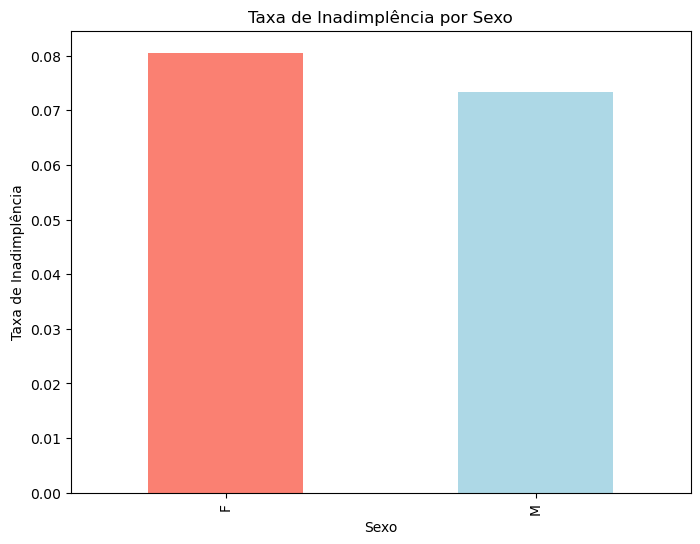

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular a taxa de inadimplência para cada sexo
taxa_sexo = df.groupby('sexo')['mau'].mean()

# Plotar
plt.figure(figsize=(8, 6))
taxa_sexo.plot(kind='bar', color=['salmon', 'lightblue'])
plt.title("Taxa de Inadimplência por Sexo")
plt.ylabel("Taxa de Inadimplência")
plt.xlabel("Sexo")
plt.show()

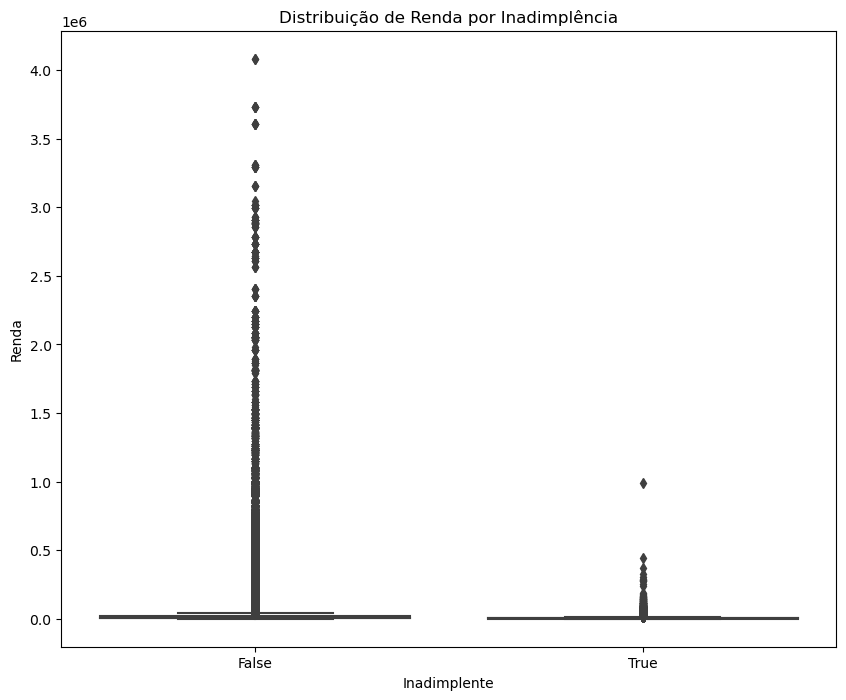

In [5]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='mau', y='renda', data=df)
plt.title("Distribuição de Renda por Inadimplência")
plt.ylabel("Renda")
plt.xlabel("Inadimplente")
plt.show()

In [6]:
taxa_sexo = df.groupby('sexo')['mau'].mean()
print(taxa_sexo)

sexo
F    0.080522
M    0.073397
Name: mau, dtype: float64


In [7]:
media_renda = df.groupby('mau')['renda'].mean()
print(media_renda)

mau
False    24804.689618
True      4774.871007
Name: renda, dtype: float64


### Taxa de Inadimplência por Sexo

O gráfico mostra que a taxa de inadimplência é ligeiramente maior para indivíduos do sexo "F" (aproximadamente 8.05%) em comparação com indivíduos do sexo "M" (aproximadamente 7.34%).<br><br>
**Isto é confirmado pelos números:**<br>
Taxa de inadimplência para "F": 0.0805 ou 8.05%<br>
Taxa de inadimplência para "M": 0.0734 ou 7.34%<br>
### Distribuição de Renda por Inadimplência

O gráfico boxplot mostra uma diferença significativa nas distribuições de renda entre os indivíduos inadimplentes e não inadimplentes.<br><br>
A mediana da renda para os não inadimplentes é visivelmente mais alta do que a mediana da renda para os inadimplentes. Além disso, há um maior espalhamento (variação) na distribuição de renda entre os não inadimplentes, com alguns outliers com renda muito alta. Já os inadimplentes têm uma distribuição mais concentrada, com menos variação e sem outliers tão extremos.<br><br>
**Os números confirmam essa observação:**<br><br>
Renda média para não inadimplentes: 24,804.69<br>
Renda média para inadimplentes: 4,774.87<br><br>
Desta forma, pode-se inferir preliminarmente que:

Indivíduos do sexo "F" têm uma taxa de inadimplência ligeiramente mais alta do que os do sexo "M".<br>
Indivíduos inadimplentes, em média, têm uma renda significativamente menor do que os não inadimplentes.


## Desenvolvimento do modelo

Desenvolva um modelo de *credit scoring* através de uma regressão logística.

- Trate valores missings e outliers
- Trate 'zeros estruturais'
- Faça agrupamentos de categorias conforme vimos em aula
- Proponha uma equação preditiva para 'mau'
- Caso hajam categorias não significantes, justifique

In [8]:
import pandas as pd

# Verificar valores faltantes
print(df.isnull().sum())

data_ref                      0
index                         0
sexo                          0
posse_de_veiculo              0
posse_de_imovel               0
qtd_filhos                    0
tipo_renda                    0
educacao                      0
estado_civil                  0
tipo_residencia               0
idade                         0
tempo_emprego            125957
qt_pessoas_residencia         0
renda                         0
mau                           0
dtype: int64


In [9]:
# Substituir NaN pela média da coluna 'tempo_emprego'
df['tempo_emprego'].fillna(df['tempo_emprego'].mean(), inplace=True)

# Verificar novamente os valores faltantes para confirmar
print(df.isnull().sum())

data_ref                 0
index                    0
sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
renda                    0
mau                      0
dtype: int64


In [11]:
from sklearn.preprocessing import OneHotEncoder

# Selecionar colunas categóricas
cat_columns = df.select_dtypes(include=['object']).columns

# Codificação one-hot
encoder = OneHotEncoder(drop='first', sparse_output=False)
df_encoded = pd.DataFrame(encoder.fit_transform(df[cat_columns]))
df_encoded.columns = encoder.get_feature_names_out(cat_columns)
df = pd.concat([df, df_encoded], axis=1).drop(columns=cat_columns)

# Selecionar apenas colunas numéricas para calcular os quantis
num_cols = df.select_dtypes(include=[np.number]).columns

Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Definindo limites
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remover outliers apenas com base nas colunas numéricas
df = df[~((df[num_cols] < lower_bound) | (df[num_cols] > upper_bound)).any(axis=1)]

# Excluir a Coluna de Data
df.drop('data_ref', axis=1, inplace=True)
df.drop('index', axis=1, inplace=True)

# Agora você pode separar suas variáveis independentes e dependentes e treinar o modelo
X = df.drop('mau', axis=1)
y = df['mau']

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crie e treine o modelo de regressão logística
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Verifique a acurácia do modelo
accuracy = logreg.score(X_test, y_test)
print(f'Acurácia do modelo: {accuracy:.2f}')

# Coeficientes e intercepto
print("Coeficientes:", logreg.coef_)
print("Intercepto:", logreg.intercept_)

Acurácia do modelo: 0.91
Coeficientes: [[ 1.14388380e-01 -4.10594517e-03 -2.63944661e-02 -1.25934236e-01
  -1.63899291e-04 -6.95403085e-02 -5.73130756e-02 -1.37272836e-01
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -1.64776247e-01  0.00000000e+00 -6.63828263e-02  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -2.33523268e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]]
Intercepto: [-0.23354783]


## Avaliação do modelo

Avalie o poder discriminante do modelo pelo menos avaliando acurácia, KS e Gini.

Avalie estas métricas nas bases de desenvolvimento e *out of time*.

In [16]:
from sklearn.metrics import roc_auc_score, roc_curve

# Probabilidades de previsão
y_prob_train = logreg.predict_proba(X_train)[:,1]
y_prob_test = logreg.predict_proba(X_test)[:,1]

def ks_statistic(y_true, y_prob):
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    return max(tpr - fpr)

gini_train = 2*roc_auc_score(y_train, y_prob_train) - 1
gini_test = 2*roc_auc_score(y_test, y_prob_test) - 1

ks_train = ks_statistic(y_train, y_prob_train)
ks_test = ks_statistic(y_test, y_prob_test)

print(f"Gini de treinamento: {gini_train:.4f}")
print(f"Gini de teste: {gini_test:.4f}")
print(f"KS de treinamento: {ks_train:.4f}")
print(f"KS de teste: {ks_test:.4f}")

Gini de treinamento: 0.4906
Gini de teste: 0.5013
KS de treinamento: 0.3705
KS de teste: 0.3824
